In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectFromModel 
import matplotlib.pyplot as plt

In [2]:
#loading the data
dt=pd.read_csv('Book1my.csv')
dt.head(6)

,tag,age,season,category,place
0,pilgrimage,40-80,summer,friends,rishikesh
1,pilgrimage,40-80,winter,family,rameshwaram
2,pilgrimage,40-80,summer,family,kedarnath
3,historical,13-70,spring,family,agra
4,historical,13-70,spring,couple,jaipur
5,historical,13-70,winter,family,kanyakumari


In [3]:
ndata  = dt.drop(columns=['age'])
ndata.head(5)

,tag,season,category,place
0,pilgrimage,summer,friends,rishikesh
1,pilgrimage,winter,family,rameshwaram
2,pilgrimage,summer,family,kedarnath
3,historical,spring,family,agra
4,historical,spring,couple,jaipur


In [4]:
#hot encoding
data=pd.get_dummies(ndata,columns=['tag','season','category'])
data.head(5)

,place,tag_adventure,tag_beaches,tag_cultural,tag_historical,tag_mountains,tag_pilgrimage,tag_trekking,tag_waterfalls,season_spring,season_summer,season_winter,category_couple,category_family,category_friends
0,rishikesh,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,rameshwaram,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,kedarnath,0,0,0,0,0,1,0,0,0,1,0,0,1,0
3,agra,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,jaipur,0,0,0,1,0,0,0,0,1,0,0,1,0,0


In [5]:
X = data.drop("place", axis=1)  
y = data["place"] 

In [6]:
#data cleaning
data.isnull().sum()

place               0
tag_adventure       0
tag_beaches         0
tag_cultural        0
tag_historical      0
tag_mountains       0
tag_pilgrimage      0
tag_trekking        0
tag_waterfalls      0
season_spring       0
season_summer       0
season_winter       0
category_couple     0
category_family     0
category_friends    0
dtype: int64

In [7]:
data.shape

(32, 15)

In [8]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Decision Tree

In [10]:
#Hyperparameter tuning using GridSearchCV for Decision Tree
param_grid_dt = {#'criterion' : ["gini","entropy"],
                 #'max_leaf_nodes': [8,9,10],
            'max_depth': [6,7,8,10,None],
              'min_samples_split': [2, 4, 6 ,10 ,13,19,25 ]}
dt_model = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=8,random_state=42)
dt_grid = GridSearchCV(dt_model, param_grid=param_grid_dt, cv=5)
dt_grid.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              max_leaf_nodes=8,
                                              random_state=42),
             param_grid={'max_depth': [6, 7, 8, 10, None],
                         'min_samples_split': [2, 4, 6, 10, 13, 19, 25]})

In [11]:
featuresrf = param_grid_dt.keys()

for feature in featuresrf:
    print(feature)

max_depth
min_samples_split


In [12]:
dt_grid.score(X_train, y_train)

0.72

In [13]:
dt_grid.score(X_test, y_test)

0.42857142857142855

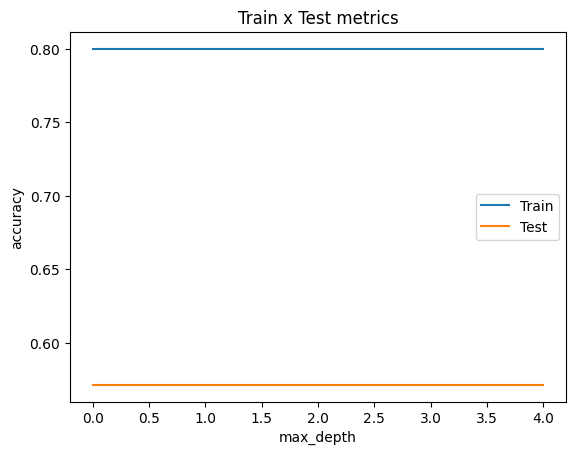

In [14]:
accuracy_list_train = []
accuracy_list_test = []
max_depth=param_grid_dt['max_depth']
for max_depth in max_depth:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    dt_model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = 42).fit(X_train,y_train) 
    predictions_train = dt_model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = dt_model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
#plt.xticks(range(0,20,1)) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

##training and testing pass ane chahiye ya intersect krne chahiye but now not implies overfiting ho raha

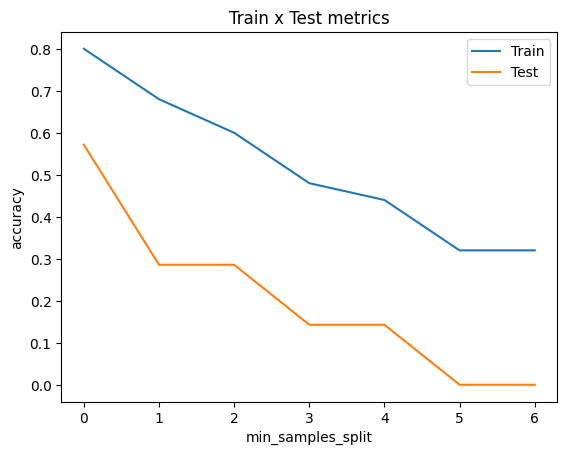

In [15]:
accuracy_list_train = []
accuracy_list_test = []
min_samples_split=param_grid_dt['min_samples_split']
for min_samples_split in min_samples_split:
    
    dt_model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = 42).fit(X_train,y_train) 
    predictions_train = dt_model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = dt_model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

In [16]:
#For best hyperparameters for the Decision Tree model
best_dt_params = dt_grid.best_params_
best_dt_model = DecisionTreeClassifier(**best_dt_params,random_state=42)
best_dt_model
###best depth 7 ke liye aa raha abhi tk

DecisionTreeClassifier(max_depth=6, random_state=42)

In [17]:
best_dt_model = DecisionTreeClassifier(**best_dt_params, random_state=42)
best_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [18]:
#for training metric
accuracy_dt = best_dt_model.score(X_train, y_train)
print("Accuracy (Decision Tree):", accuracy_dt*100)

Accuracy (Decision Tree): 80.0


In [19]:
#Evaluating the Decision Tree model
accuracy_dt = best_dt_model.score(X_test, y_test)
print("Accuracy (Decision Tree):", accuracy_dt)

y_pred_dt = best_dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')

print("Accuracy (Decision Tree):", accuracy_dt*100)
print("Precision (Decision tree):", precision_dt*100)

Accuracy (Decision Tree): 0.5714285714285714
Accuracy (Decision Tree): 57.14285714285714
Precision (Decision tree): 57.14285714285714


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
#cross-validation
cv_scores_dt = cross_val_score(best_dt_model, X, y, cv=5)
mean_cv_accuracy_dt = cv_scores_dt.mean()
print("Cross-Validation Accuracy (Decision Tree):", mean_cv_accuracy_dt)

Cross-Validation Accuracy (Decision Tree): 0.4095238095238095


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


# Random Forest

In [21]:
#Hyperparameter tuning using GridSearchCV for Random Forest
param_grid_rf = {'n_estimators': [5,10,50,100, 200, 300],
    'max_depth': [7,8,9,10,None],
    'min_samples_split': [2,5,8, 10,15],
    'min_samples_leaf': [1,2,3,4 , 7, 10]}
rf_model = RandomForestClassifier(criterion='entropy',max_leaf_nodes=8,max_samples=0.75,random_state=42)
rf_grid = GridSearchCV(rf_model, param_grid=param_grid_rf, cv=3)
rf_grid.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(criterion='entropy',
                                              max_leaf_nodes=8,
                                              max_samples=0.75,
                                              random_state=42),
             param_grid={'max_depth': [7, 8, 9, 10, None],
                         'min_samples_leaf': [1, 2, 3, 4, 7, 10],
                         'min_samples_split': [2, 5, 8, 10, 15],
                         'n_estimators': [5, 10, 50, 100, 200, 300]})

In [22]:
featuresrf = param_grid_rf.keys()

for feature in featuresrf:
    print(feature)

n_estimators
max_depth
min_samples_split
min_samples_leaf


In [23]:
rf_grid.score(X_train, y_train)

0.8

In [24]:
rf_grid.score(X_test, y_test)

0.2857142857142857

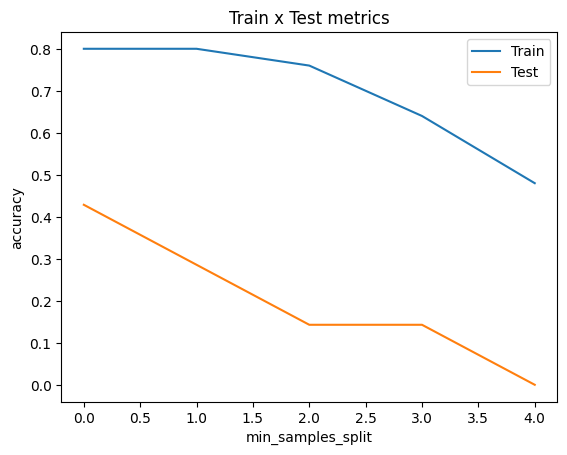

In [25]:
accuracy_list_train = []
accuracy_list_test = []
min_samples_split=param_grid_rf['min_samples_split']
for min_samples_split in min_samples_split:
    rf_model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = 42).fit(X_train,y_train) 
    predictions_train = rf_model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = rf_model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

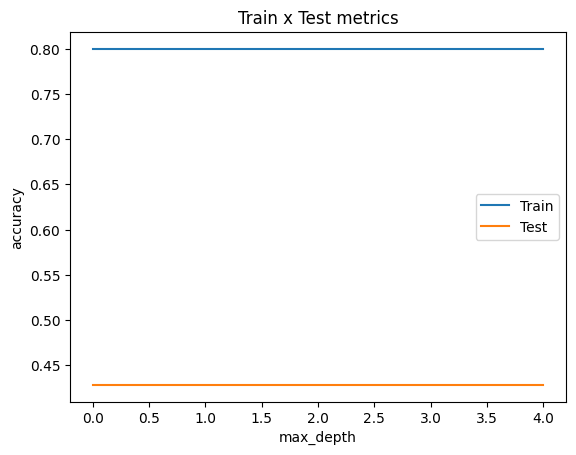

In [26]:
accuracy_list_train = []
accuracy_list_test = []
max_depth=param_grid_rf['max_depth']
for max_depth in max_depth:
    rf_model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = 42).fit(X_train,y_train) 
    predictions_train = rf_model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = rf_model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

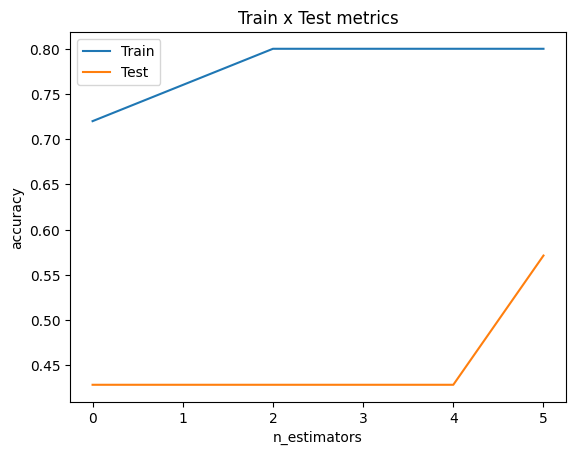

In [27]:
accuracy_list_train = []
accuracy_list_test = []
n_estimators=param_grid_rf['n_estimators']
for n_estimators in n_estimators:
    rf_model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = 42).fit(X_train,y_train) 
    predictions_train = rf_model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = rf_model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

In [28]:
# best hyperparameters for the Random Forest model dekh rahe
best_rf_params = rf_grid.best_params_
best_rf_model = RandomForestClassifier(**best_rf_params,random_state=42)
best_rf_model

RandomForestClassifier(max_depth=7, min_samples_split=5, random_state=42)

In [29]:
best_rf_model = RandomForestClassifier(**best_rf_params, random_state=42)
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_split=5, random_state=42)

In [30]:
#for training metric
accuracy_rf = best_rf_model.score(X_train, y_train)
print("Accuracy (Random forest):", accuracy_rf*100)

Accuracy (Random forest): 80.0


In [31]:
# Evaluation for Random Forest model
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')


print("Accuracy (Random Forest):", accuracy_rf*100)
print("Precision (Random Forest):", precision_rf*100)


Accuracy (Random Forest): 28.57142857142857
Precision (Random Forest): 21.428571428571427


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
#ye run nhi ho raha but krna hai
#Performing cross-validation
cv_scores_rf = cross_val_score(best_rf_model, X, y, cv=5)
mean_cv_accuracy_rf = cv_scores_rf.mean()
print("Cross-Validation Accuracy (Random Forest):", mean_cv_accuracy_rf)


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy (Random Forest): 0.3428571428571428


In [33]:
#to run
#feature importance analysis kon sa feature is more important but koi scence nhi banta ig

feature_importances_rf = best_rf_model.feature_importances_
feature_names = X.columns

In [34]:
# Performing feature selection
#selector = SelectFromModel(rf_grid, threshold="median")
#selector.fit(X_train, y_train)
#selected_feature_names = feature_names[selector.get_support()]

In [35]:
#..............
#Random tree model
#rf_classifier = RandomForestClassifier(criterion='entropy',max_leaf_nodes=8,random_state=0)
#rf_classifier.fit(X_train, y_train)

# Gradient Boosting

In [36]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
features = param_grid_gb.keys()

for feature in features:
    print(feature)

learning_rate
max_depth
n_estimators


In [38]:
#hyperparameter tuning for XGBoost
param_grid_gb = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

In [39]:
gb_classifier = GradientBoostingClassifier(random_state=42)
grid_search_gb = GridSearchCV(estimator=gb_classifier, param_grid=param_grid_gb, cv=3)
grid_search_gb.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [41]:
best_params_gb = grid_search_gb.best_params_
print("Best Parameters (GBoost):", best_params_gb)

Best Parameters (GBoost): {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [42]:
gb_classifier = GradientBoostingClassifier(**best_params_gb, random_state=42)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [43]:
#for training metric
accuracy_gb = gb_classifier.score(X_train, y_train)
print("Accuracy (Decision Tree):", accuracy_gb*100)

Accuracy (Decision Tree): 80.0


In [44]:
y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
print("Accuracy (Gradient Boosting):", accuracy_gb*100)
print("Precision (Gradient Boosting):", precision_gb*100)

#Iski bhi aur jada aani chahiye thi

Accuracy (Gradient Boosting): 42.857142857142854
Precision (Gradient Boosting): 42.857142857142854


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
#Cross-validation
cv_scores_gb= cross_val_score(gb_classifier, X, y, cv=5)
mean_cv_accuracy_gb = cv_scores_gb.mean()
print("Cross-Validation Accuracy (GB):", mean_cv_accuracy_gb)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy (GB): 0.3714285714285714


In [46]:
#feature importance analysis
feature_importances_gb= gb_classifier.feature_importances_
feature_names = X_train.columns

In [47]:
#feature analysis for gb
feature_analysis_gb = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_gb})
feature_analysis_gb = feature_analysis_gb.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_analysis_gb)

Feature Importance:
             Feature  Importance
9      season_summer    0.225409
13  category_friends    0.157852
10     season_winter    0.129185
12   category_family    0.128755
11   category_couple    0.100643
8      season_spring    0.073035
3     tag_historical    0.050758
7     tag_waterfalls    0.026664
2       tag_cultural    0.022289
4      tag_mountains    0.019109
0      tag_adventure    0.018058
5     tag_pilgrimage    0.017713
6       tag_trekking    0.016625
1        tag_beaches    0.013905


# SVM

In [48]:
from sklearn.svm import SVC

In [54]:
# Hyperparameter tuning for the SVM Classifier
svm_param_grid = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']
}
svm_classifier = SVC(random_state=42)
svm_grid_search = GridSearchCV(svm_classifier, svm_param_grid, cv=3)
svm_grid_search.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']})

In [55]:
svm_grid_search.score(X_train, y_train)

0.8

In [56]:
# best hyperparameters for the Random Forest model dekh rahe
best_svm_params = svm_grid_search.best_params_
best_svm_model = SVC(**best_svm_params,random_state=42)
best_svm_model

SVC(C=1, kernel='linear', random_state=42)

In [60]:
best_svm_model = SVC(**best_svm_params, random_state=42)
best_svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [62]:
y_pred_svm = best_svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_rf, average='weighted')


print("Accuracy (SVM):", accuracy_svm*100)
print("Precision (SVM):", precision_svm*100)

Accuracy (SVM): 57.14285714285714
Precision (SVM): 21.428571428571427


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
# Comparing the performance of different models
models = ['Random Forest', 'Decision tree','Gradient Boosting','SVM']
accuracies = [accuracy_rf*100, accuracy_dt*100,accuracy_gb*100,accuracy_svm*100]
precisions = [precision_rf*100, precision_dt*100,precision_gb*100,precision_svm*100]

In [73]:
results_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies, 'Precision': precisions})
print(results_df)

               Model   Accuracy  Precision
0      Random Forest  28.571429  21.428571
1      Decision tree  57.142857  57.142857
2  Gradient Boosting  42.857143  42.857143
3                SVM  57.142857  21.428571


In [74]:
#knowing the headings of training set
feature_names = X_train.columns
target_name = y_train.name
print(feature_names)
print(target_name)

Index(['tag_adventure', 'tag_beaches', 'tag_cultural', 'tag_historical',
       'tag_mountains', 'tag_pilgrimage', 'tag_trekking', 'tag_waterfalls',
       'season_spring', 'season_summer', 'season_winter', 'category_couple',
       'category_family', 'category_friends'],
      dtype='object')
place


In [75]:
#Now taking user input 
tag=input("Enter tag: ")
season = input("Enter season: ")
category = input("Enter category: ")

Enter tag: adventure
Enter season: spring
Enter category: couple


In [76]:
#Converting the given input
prediction1 = best_dt_model.predict([[int(tag == "adventure"),int(tag == "beaches"), int(tag == "cultural"), int(tag == "historical"), int(tag == "mountains"), int(tag == "pilgrimage"), int(tag == "trekking"), int(tag == "waterfalls"), int(season == "spring"), int(season == "summer"), int(season == "winter"), int(category == "couple"),int(category == "family"),int(category == "friends")]])
prediction2 = best_rf_model.predict([[int(tag == "adventure"), int(tag == "beaches"), int(tag == "cultural"), int(tag == "historical"), int(tag == "mountains"), int(tag == "pilgrimage"), int(tag == "trekking"), int(tag == "waterfalls"), int(season == "spring"), int(season == "summer"), int(season == "winter"), int(category == "couple"),int(category == "family"),int(category == "friends")]])
prediction3 = gb_classifier.predict([[int(tag == "adventure"), int(tag == "beaches"), int(tag == "cultural"), int(tag == "historical"), int(tag == "mountains"), int(tag == "pilgrimage"), int(tag == "trekking"), int(tag == "waterfalls"), int(season == "spring"), int(season == "summer"), int(season == "winter"), int(category == "couple"),int(category == "family"),int(category == "friends")]])
prediction4 = best_svm_model.predict([[int(tag == "adventure"), int(tag == "beaches"), int(tag == "cultural"), int(tag == "historical"), int(tag == "mountains"), int(tag == "pilgrimage"), int(tag == "trekking"), int(tag == "waterfalls"), int(season == "spring"), int(season == "summer"), int(season == "winter"), int(category == "couple"),int(category == "family"),int(category == "friends")]])
# Final Prediction based on user input
print("Recommended place from Decision Tree Model: ",prediction1[0])
print("Recommended place from Random forest Model: ",prediction2[0])
print("Recommended place from Gradient Boosting: ",prediction3[0])
print("Recommended place from SVM: ",prediction4[0])

Recommended place from Decision Tree Model:  jaipur
Recommended place from Random forest Model:  jaipur
Recommended place from Gradient Boosting:  jaipur
Recommended place from SVM:  jaipur


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


C:\Users\HP\AppData\Local\Temp\ipykernel_18624\653547276.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(feature_names, rotation=90)
C:\Users\HP\AppData\Local\Temp\ipykernel_18624\653547276.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(feature_names, rotation=90)


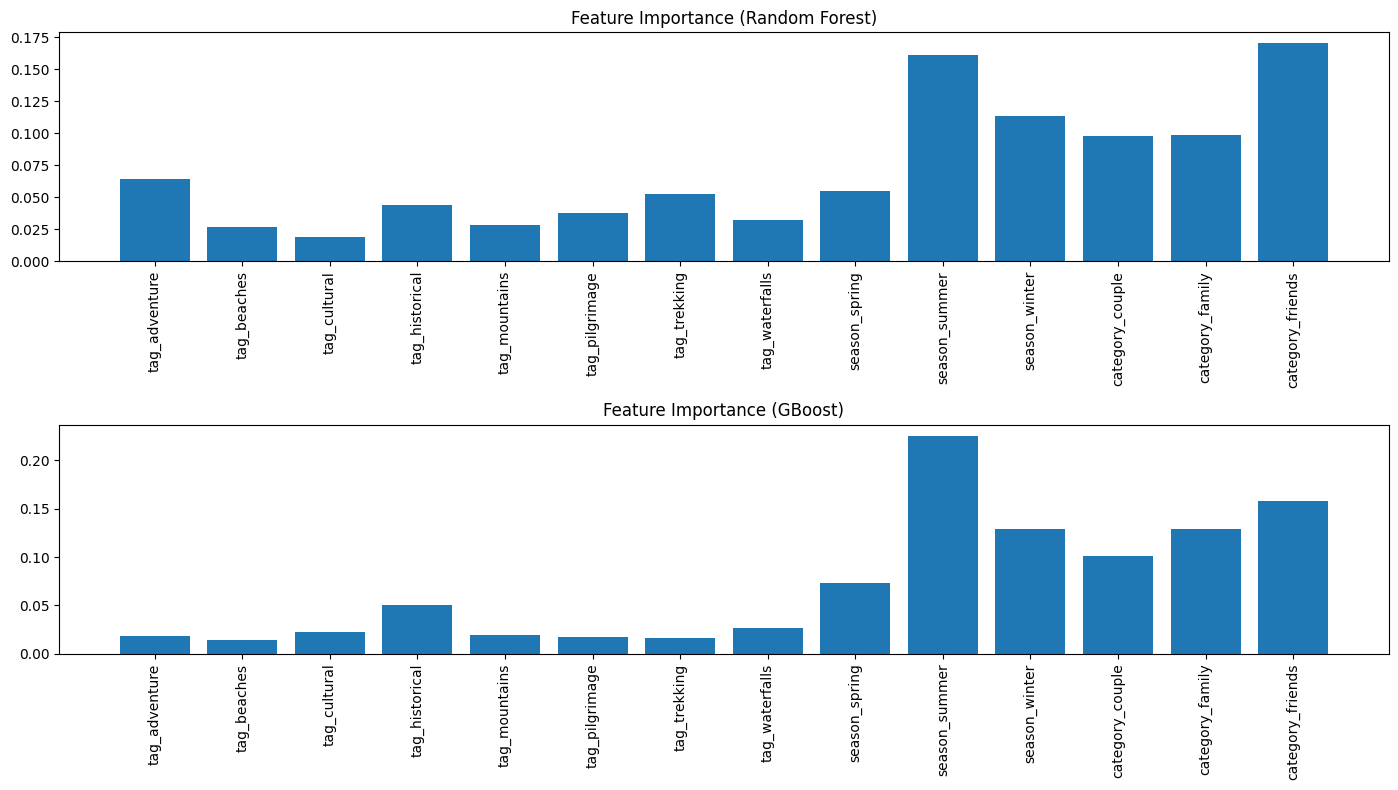

In [77]:
#feature importance analysis and visualization

##but hamare model mai mujhe as such kuch significance smjh nhi aa raha bcoz it will depend on dataset incdling tag and all

fig, ax = plt.subplots(2, 1, figsize=(14, 8))
ax[0].bar(feature_names, feature_importances_rf)
ax[0].set_title('Feature Importance (Random Forest)')
ax[0].set_xticklabels(feature_names, rotation=90)

ax[1].bar(feature_names, feature_importances_gb)
ax[1].set_title('Feature Importance (GBoost)')
ax[1].set_xticklabels(feature_names, rotation=90)


plt.tight_layout()
plt.show()

In [78]:
feature_names = X_train.columns
target_name = y_train.name

In [79]:
from sklearn import tree
print(tree.export_text(best_dt_model))

|--- feature_13 <= 0.50
|   |--- feature_9 <= 0.50
|   |   |--- feature_10 <= 0.50
|   |   |   |--- feature_12 <= 0.50
|   |   |   |   |--- class: jaipur
|   |   |   |--- feature_12 >  0.50
|   |   |   |   |--- class: agra
|   |   |--- feature_10 >  0.50
|   |   |   |--- feature_11 <= 0.50
|   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |--- class: rameshwaram
|   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |--- class: kanyakumari
|   |   |   |--- feature_11 >  0.50
|   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |--- class: kanyakumari
|   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |--- class: chennai
|   |--- feature_9 >  0.50
|   |   |--- feature_12 <= 0.50
|   |   |   |--- class: shimla
|   |   |--- feature_12 >  0.50
|   |   |   |--- class: kedarnath
|--- feature_13 >  0.50
|   |--- feature_9 <= 0.50
|   |   |--- feature_10 <= 0.50
|   |   |   |--- class: goa
|   |   |--- feature_10 >  0.50
|   |   |   |--- class: chennai
|   |--- featu

[Text(0.58125, 0.9285714285714286, 'x[13] <= 0.5\ngini = 0.89\nsamples = 25\nvalue = [1, 2, 2, 1, 2, 3, 3, 2, 2, 5, 2]'),
 Text(0.3625, 0.7857142857142857, 'x[9] <= 0.5\ngini = 0.837\nsamples = 14\nvalue = [1, 1, 0, 0, 2, 3, 3, 0, 2, 0, 2]'),
 Text(0.225, 0.6428571428571429, 'x[10] <= 0.5\ngini = 0.765\nsamples = 9\nvalue = [1, 1, 0, 0, 2, 3, 0, 0, 2, 0, 0]'),
 Text(0.1, 0.5, 'x[12] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]'),
 Text(0.05, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]'),
 Text(0.15, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.35, 0.5, 'x[11] <= 0.5\ngini = 0.611\nsamples = 6\nvalue = [0, 1, 0, 0, 0, 3, 0, 0, 2, 0, 0]'),
 Text(0.25, 0.35714285714285715, 'x[3] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0]'),
 Text(0.2, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]'),


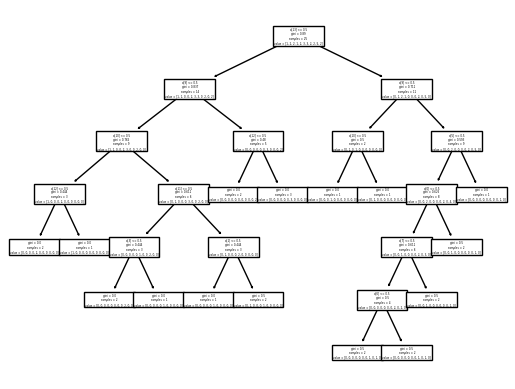

In [80]:
#Plotting decision tree
tree.plot_tree(best_dt_model)